<a href="https://colab.research.google.com/github/mtlangschwager/Matrix_SQL/blob/main/Langschwager_Project_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import multivariate_normal as mvn

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Classroom/Matrix_SQL/Matthew Langschwager - raw_house_data_EDA2 (1).csv')

In [4]:
data

,MLS,sold_price,zipcode,longitude,latitude,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft,garage,kitchen_features,fireplaces,floor_covering,HOA
0,21902353,728400.0,85755,-110.985712,32.467526,0.02,1644.23,2019,3,3.0,1942.0,2,"Dishwasher, Garbage Disposal, Gas Range, Islan...",1,"Carpet, Ceramic Tile",213
1,21819891,580000.0,85712,-110.888518,32.262718,0.02,5151.00,2001,2,3.0,2348.0,2,"Dishwasher, Garbage Disposal, Gas Range, Islan...",2,Concrete,95
2,21830062,571650.0,85745,-110.985754,32.218193,0.03,3186.79,2011,3,2.0,2024.0,0,"Dishwasher, Garbage Disposal, Gas Range, Pantr...",0,"Concrete, Mexican Tile",99
3,21814433,737000.0,85745,-110.986717,32.218715,0.04,503.92,2017,3,3.0,2130.0,1,"Dishwasher, Freezer, Garbage Disposal, Gas Ran...",0,"Concrete, Wood",99
4,21719453,799000.0,85715,-110.846450,32.260804,0.04,7295.74,1980,5,4.0,3417.0,2,"Dishwasher, Garbage Disposal, Refrigerator",3,Natural Stone,144
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4880,21908995,500000.0,85638,-110.082311,31.712638,555.60,4669.32,1934,11,11.0,5800.0,0,Pantry: Closet,1,"Vinyl, Wood",None
4881,21919321,4500000.0,85646,-111.035925,31.645878,636.67,8418.58,1930,7,5.0,9019.0,4,"Dishwasher, Double Sink, Pantry: Butler, Refri...",4,"Ceramic Tile, Laminate, Wood",None
4882,21424469,2500000.0,85609,-110.095713,32.057222,1048.18,2441.60,1985,2,2.0,2895.0,0,"Refrigerator, Oven",1,"Carpet, Mexican Tile, Other",0
4883,21529082,4200000.0,85646,-111.045371,31.594213,1707.00,10422.36,1997,2,2.0,7300.0,0,"Dishwasher, Garbage Disposal",5,"Natural Stone, Other",0


(Placing ZIP Codes off to the side for later, in order to determine viability of future work.)

In [5]:
y = data["zipcode"]

In [7]:
zip_codes = set(y)
zip_codes

{85118,
 85192,
 85541,
 85601,
 85602,
 85603,
 85605,
 85609,
 85610,
 85611,
 85614,
 85615,
 85619,
 85621,
 85622,
 85623,
 85624,
 85625,
 85629,
 85630,
 85637,
 85638,
 85640,
 85641,
 85643,
 85645,
 85646,
 85648,
 85658,
 85701,
 85704,
 85705,
 85710,
 85711,
 85712,
 85713,
 85715,
 85716,
 85718,
 85719,
 85730,
 85737,
 85739,
 85742,
 85743,
 85745,
 85747,
 85748,
 85749,
 85750,
 85755,
 85901,
 85929,
 85935,
 86024,
 86323}

Sixteen is too many categories. The least useful/least essential must be dropped from the analysis.

In [8]:
data.drop("MLS",axis=1,inplace=True)
data.drop("zipcode",axis=1,inplace=True)
data.drop("longitude",axis=1,inplace=True)
data.drop("latitude",axis=1,inplace=True)
data.drop("garage",axis=1,inplace=True)
data.drop("kitchen_features",axis=1,inplace=True)
data.drop("fireplaces",axis=1,inplace=True)
data.drop("floor_covering",axis=1,inplace=True)
data.drop("HOA",axis=1,inplace=True)

In [9]:
data

,sold_price,lot_acres,taxes,year_built,bedrooms,bathrooms,sqrt_ft
0,728400.0,0.02,1644.23,2019,3,3.0,1942.0
1,580000.0,0.02,5151.00,2001,2,3.0,2348.0
2,571650.0,0.03,3186.79,2011,3,2.0,2024.0
3,737000.0,0.04,503.92,2017,3,3.0,2130.0
4,799000.0,0.04,7295.74,1980,5,4.0,3417.0
...,...,...,...,...,...,...,...
4880,500000.0,555.60,4669.32,1934,11,11.0,5800.0
4881,4500000.0,636.67,8418.58,1930,7,5.0,9019.0
4882,2500000.0,1048.18,2441.60,1985,2,2.0,2895.0
4883,4200000.0,1707.00,10422.36,1997,2,2.0,7300.0


Lot acreage values present a logarithmic trend. The plots should be adjusted accordingly for better visualization.

In [10]:
data['log_lot_acres'] = np.log10(data['lot_acres'])
data.drop("lot_acres",axis=1,inplace=True)

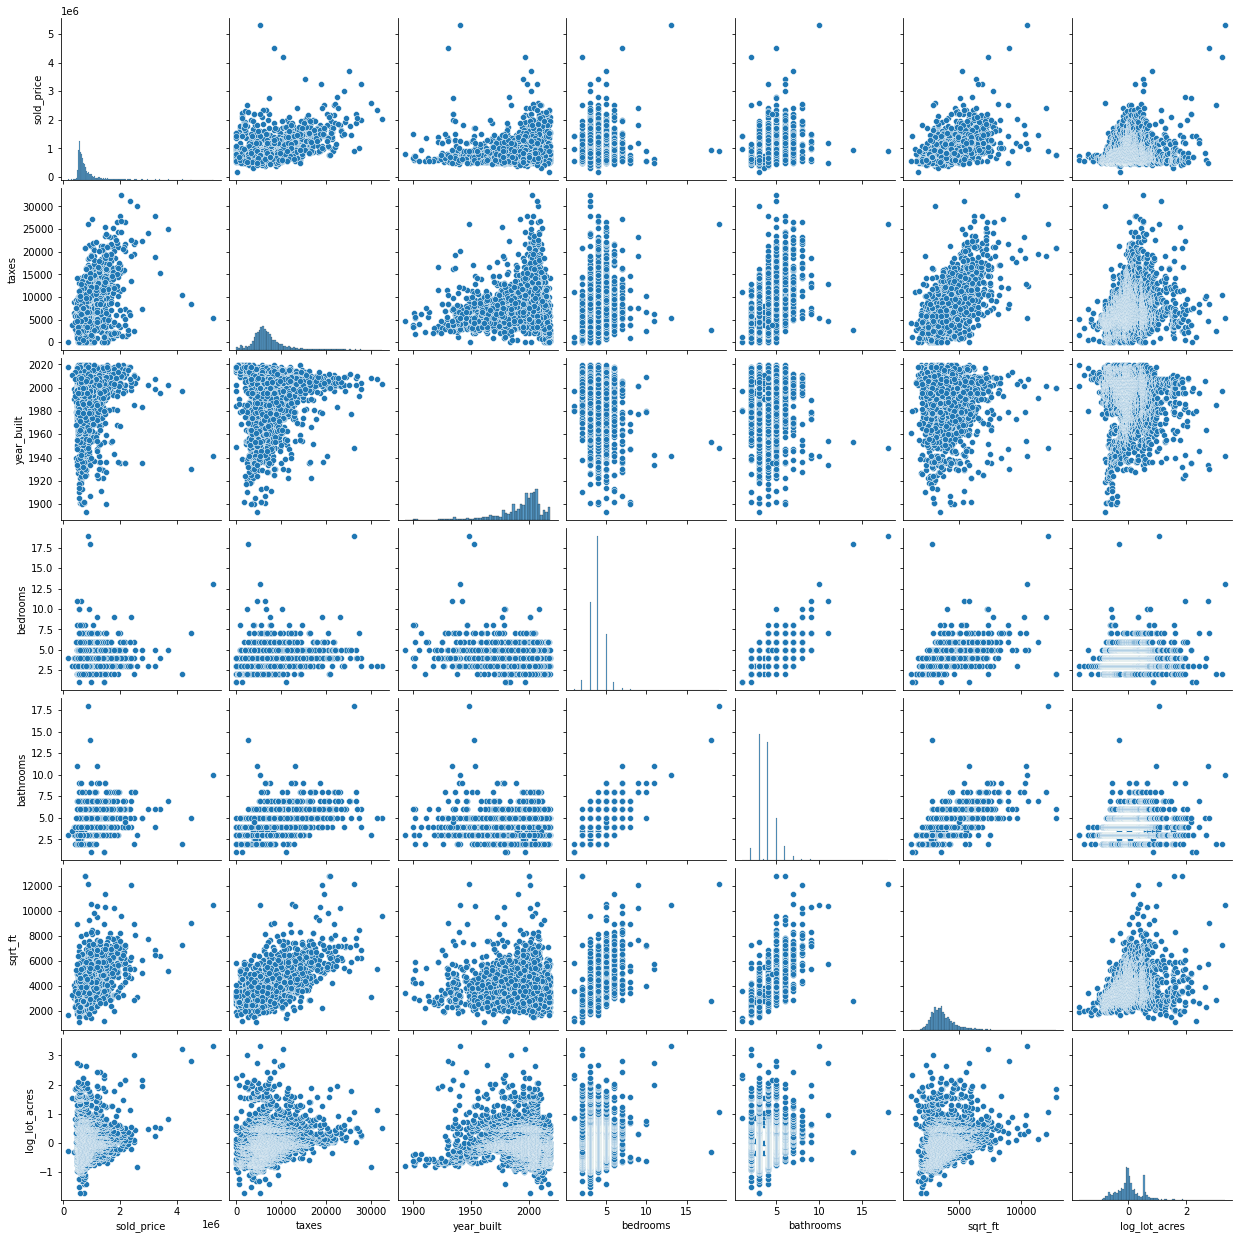

In [11]:
sns.pairplot(data)